In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import mysql.connector

# Conexión a la base de datos MySQL usando mysql.connector
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='l3o.%data546.',
    database='starbucks_gold'
)

print('Conexión exitosa a la base de datos starbucks_gold')


Conexión exitosa a la base de datos starbucks_gold


In [16]:
# KPI 1: % de ventas por grupo etario
query_edad = "SELECT * FROM ventas_edad"
df_edad = pd.read_sql(query_edad, conn)

print('📊 KPI 1 - Ventas por Grupo Etario:')
print(df_edad.head())
print(f"Columnas: {list(df_edad.columns)}")


📊 KPI 1 - Ventas por Grupo Etario:
   id_ventas_edad fecha_registro grupo_etario  porcentaje
0               1     2025-01-06        18-25        9.67
1               2     2025-01-06        26-35       28.82
2               3     2025-01-06        36-50       49.70
3               4     2025-01-06          51+       11.81
4               5     2025-01-13        18-25       11.82
Columnas: ['id_ventas_edad', 'fecha_registro', 'grupo_etario', 'porcentaje']


C:\Users\lmata\AppData\Local\Temp\ipykernel_11484\3905205664.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_edad = pd.read_sql(query_edad, conn)


In [17]:
# KPI 2: % de ventas por categoría de productos
query_categoria = "SELECT * FROM ventas_categoria"
df_categoria = pd.read_sql(query_categoria, conn)

print('📊 KPI 2 - Ventas por Categoría:')
print(df_categoria.head())
print(f"Columnas: {list(df_categoria.columns)}")


📊 KPI 2 - Ventas por Categoría:
   id_ventas_categoria fecha_registro          categoria  cantidad  porcentaje
0                    1     2025-01-06  Bebidas Calientes       358       41.56
1                    2     2025-01-06      Bebidas Frías       431       39.71
2                    3     2025-01-06             Comida       163       14.00
3                    4     2025-01-06         Accesorios        20        4.73
4                    5     2025-01-13  Bebidas Calientes       443       44.32
Columnas: ['id_ventas_categoria', 'fecha_registro', 'categoria', 'cantidad', 'porcentaje']


C:\Users\lmata\AppData\Local\Temp\ipykernel_11484\4064136673.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_categoria = pd.read_sql(query_categoria, conn)


In [18]:
# KPI 3: Cantidad de ventas por jornada del día
query_jornada = "SELECT * FROM ventas_jornada"
df_jornada = pd.read_sql(query_jornada, conn)

print('📊 KPI 3 - Ventas por Jornada:')
print(df_jornada.head())
print(f"Columnas: {list(df_jornada.columns)}")


📊 KPI 3 - Ventas por Jornada:
   id_ventas_jornada fecha_registro  cantidad_ventas_mañana  \
0                  1     2025-01-06                     409   
1                  2     2025-01-13                     397   
2                  3     2025-01-20                     425   
3                  4     2025-01-27                     391   
4                  5     2025-02-03                     460   

   cantidad_ventas_tarde  cantidad_ventas_noche periodo_mas_activo  
0                    378                    178             Mañana  
1                    362                    222             Mañana  
2                    397                    224             Mañana  
3                    412                    241              Tarde  
4                    322                    215             Mañana  
Columnas: ['id_ventas_jornada', 'fecha_registro', 'cantidad_ventas_mañana', 'cantidad_ventas_tarde', 'cantidad_ventas_noche', 'periodo_mas_activo']


C:\Users\lmata\AppData\Local\Temp\ipykernel_11484\3645462308.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_jornada = pd.read_sql(query_jornada, conn)


🔍 Verificando estructura de datos...
Columnas en df_edad: ['id_ventas_edad', 'fecha_registro', 'grupo_etario', 'porcentaje']
Columnas en df_categoria: ['id_ventas_categoria', 'fecha_registro', 'categoria', 'cantidad', 'porcentaje']
Columnas en df_jornada: ['id_ventas_jornada', 'fecha_registro', 'cantidad_ventas_mañana', 'cantidad_ventas_tarde', 'cantidad_ventas_noche', 'periodo_mas_activo']
📊 Columnas detectadas para edad: fecha=fecha_registro, valor=porcentaje, grupo=id_ventas_edad
📊 Columnas detectadas para categoría: fecha=fecha_registro, valor=porcentaje, categoria=categoria
📊 Columnas detectadas para jornada: fecha=fecha_registro, valor=cantidad_ventas_noche, jornada=periodo_mas_activo


C:\Users\lmata\AppData\Local\Temp\ipykernel_11484\2517969952.py:139: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout(pad=3.0)  # Añadir padding general
C:\Users\lmata\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


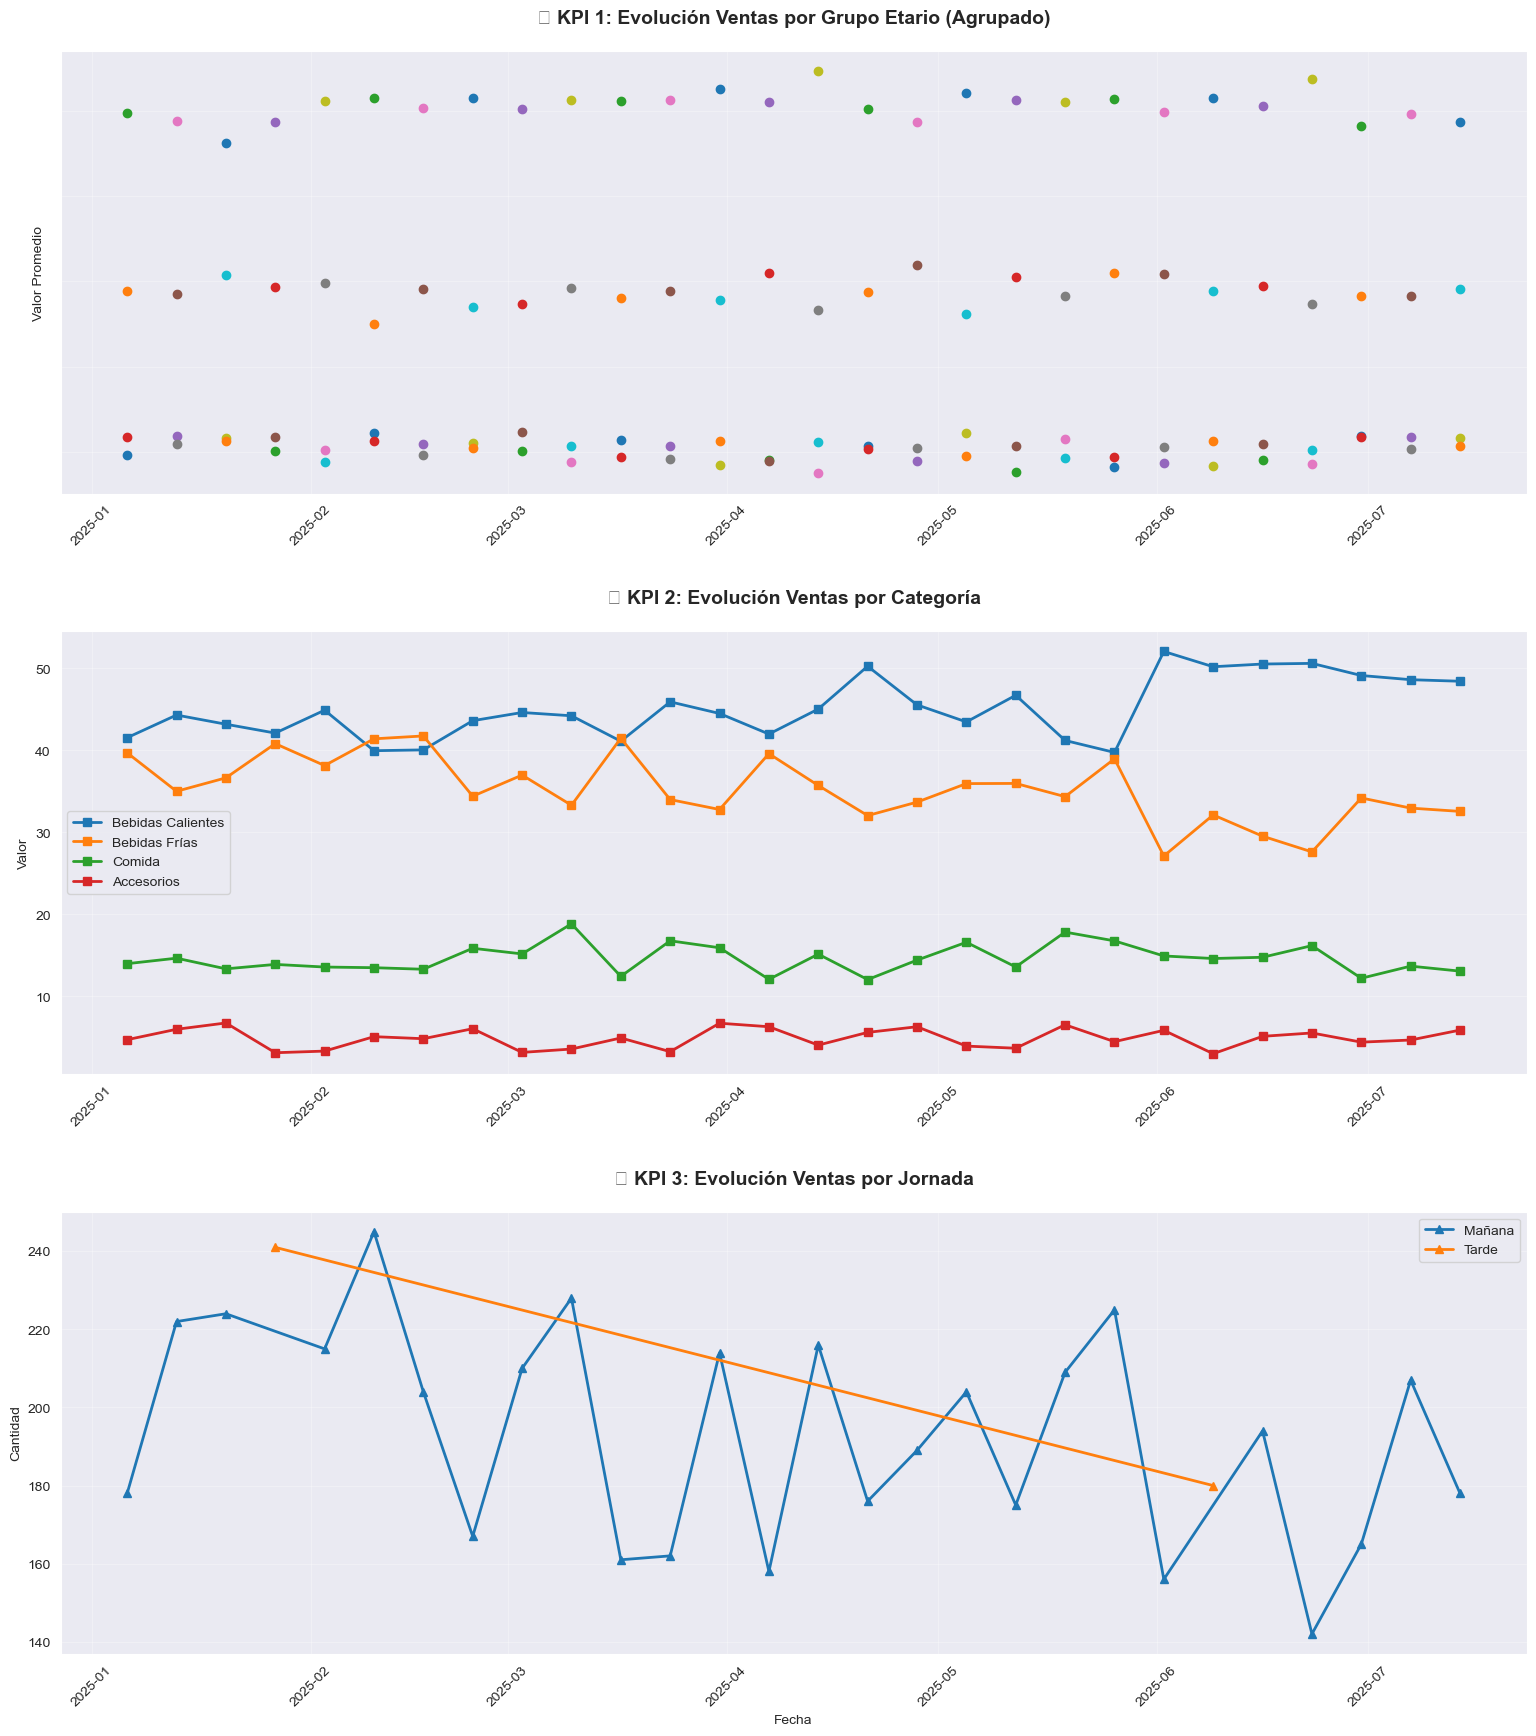

In [25]:
# Análisis y visualización de los KPIs en el tiempo
print("🔍 Verificando estructura de datos...")

# Verificar qué columnas tenemos en cada DataFrame
print("Columnas en df_edad:", list(df_edad.columns) if 'df_edad' in globals() else "df_edad no definido")
print("Columnas en df_categoria:", list(df_categoria.columns) if 'df_categoria' in globals() else "df_categoria no definido")
print("Columnas en df_jornada:", list(df_jornada.columns) if 'df_jornada' in globals() else "df_jornada no definido")

# Verificar si las variables existen antes de graficar
if 'df_edad' in globals() and 'df_categoria' in globals() and 'df_jornada' in globals():
    plt.figure(figsize=(16, 18))  # Aumentar altura para más espacio

    # Subplot 1: KPI 1 - Ventas por grupo etario
    plt.subplot(3, 1, 1)
    # Adaptarse a las columnas reales
    edad_cols = list(df_edad.columns)
    fecha_col = None
    valor_col = None
    grupo_col = None

    # Buscar columnas de fecha
    for col in edad_cols:
        if 'fecha' in col.lower() or 'date' in col.lower():
            fecha_col = col
            break

    # Buscar columnas de valor (porcentaje, cantidad, etc.)
    for col in edad_cols:
        if any(word in col.lower() for word in ['porcentaje', 'percent', 'cantidad', 'total', 'valor']):
            valor_col = col
            break

    # Buscar columnas de grupo
    for col in edad_cols:
        if any(word in col.lower() for word in ['grupo', 'edad', 'etario', 'category']):
            grupo_col = col
            break

    print(f"📊 Columnas detectadas para edad: fecha={fecha_col}, valor={valor_col}, grupo={grupo_col}")

    if fecha_col and valor_col and grupo_col:
        for grupo in df_edad[grupo_col].unique():
            data_grupo = df_edad[df_edad[grupo_col] == grupo]
            plt.plot(pd.to_datetime(data_grupo[fecha_col]), data_grupo[valor_col],
                    marker='o', label=str(grupo), linewidth=2)
        plt.title('📊 KPI 1: Evolución Ventas por Grupo Etario (Agrupado)', fontsize=14, fontweight='bold', pad=20)
        plt.ylabel('Valor Promedio')
        # plt.legend()  # Quitamos la leyenda del primer gráfico
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)
        # Ocultar las etiquetas numéricas del eje Y derecho
        plt.gca().yaxis.set_ticklabels([])
        # O alternativamente, personalizar las etiquetas del eje Y
        # plt.gca().yaxis.set_major_locator(plt.MaxNLocator(nbins=5))
    else:
        # Gráfico alternativo simple
        if len(df_edad.columns) >= 2:
            plt.bar(range(len(df_edad)), df_edad.iloc[:, 1])
            plt.title('📊 KPI 1: Datos de Grupo Etario', fontsize=14, fontweight='bold', pad=20)
            plt.ylabel('Valor')
            # Ocultar etiquetas del eje Y también en el gráfico alternativo
            plt.gca().yaxis.set_ticklabels([])

    # Subplot 2: KPI 2 - Ventas por categoría
    plt.subplot(3, 1, 2)
    cat_cols = list(df_categoria.columns)

    # Buscar columnas similares para categoría
    fecha_col_cat = None
    valor_col_cat = None
    categoria_col = None

    for col in cat_cols:
        if 'fecha' in col.lower() or 'date' in col.lower():
            fecha_col_cat = col
        elif any(word in col.lower() for word in ['porcentaje', 'percent', 'cantidad', 'total', 'valor']):
            valor_col_cat = col
        elif any(word in col.lower() for word in ['categoria', 'category', 'tipo', 'producto']):
            categoria_col = col

    print(f"📊 Columnas detectadas para categoría: fecha={fecha_col_cat}, valor={valor_col_cat}, categoria={categoria_col}")

    if fecha_col_cat and valor_col_cat and categoria_col:
        for categoria in df_categoria[categoria_col].unique():
            data_cat = df_categoria[df_categoria[categoria_col] == categoria]
            plt.plot(pd.to_datetime(data_cat[fecha_col_cat]), data_cat[valor_col_cat],
                    marker='s', label=str(categoria), linewidth=2)
        plt.title('📊 KPI 2: Evolución Ventas por Categoría', fontsize=14, fontweight='bold', pad=20)
        plt.ylabel('Valor')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)
    else:
        # Gráfico alternativo simple
        if len(df_categoria.columns) >= 2:
            plt.bar(range(len(df_categoria)), df_categoria.iloc[:, 1])
            plt.title('📊 KPI 2: Datos de Categoría', fontsize=14, fontweight='bold', pad=20)
            plt.ylabel('Valor')

    # Subplot 3: KPI 3 - Ventas por jornada
    plt.subplot(3, 1, 3)
    jorn_cols = list(df_jornada.columns)

    # Buscar columnas similares para jornada
    fecha_col_jorn = None
    valor_col_jorn = None
    jornada_col = None

    for col in jorn_cols:
        if 'fecha' in col.lower() or 'date' in col.lower():
            fecha_col_jorn = col
        elif any(word in col.lower() for word in ['cantidad', 'total', 'valor', 'ventas']):
            valor_col_jorn = col
        elif any(word in col.lower() for word in ['jornada', 'turno', 'hora', 'periodo']):
            jornada_col = col

    print(f"📊 Columnas detectadas para jornada: fecha={fecha_col_jorn}, valor={valor_col_jorn}, jornada={jornada_col}")

    if fecha_col_jorn and valor_col_jorn and jornada_col:
        for jornada in df_jornada[jornada_col].unique():
            data_jorn = df_jornada[df_jornada[jornada_col] == jornada]
            plt.plot(pd.to_datetime(data_jorn[fecha_col_jorn]), data_jorn[valor_col_jorn],
                    marker='^', label=str(jornada), linewidth=2)
        plt.title('📊 KPI 3: Evolución Ventas por Jornada', fontsize=14, fontweight='bold', pad=20)
        plt.ylabel('Cantidad')
        plt.xlabel('Fecha')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)
    else:
        # Gráfico alternativo simple
        if len(df_jornada.columns) >= 2:
            plt.bar(range(len(df_jornada)), df_jornada.iloc[:, 1])
            plt.title('📊 KPI 3: Datos de Jornada', fontsize=14, fontweight='bold', pad=20)
            plt.ylabel('Valor')
            plt.xlabel('Registros')

    plt.subplots_adjust(hspace=0.4)  # Aumentar espacio vertical entre subplots
    plt.tight_layout(pad=3.0)  # Añadir padding general
    plt.show()

else:
    print("❌ Error: No se han cargado los datos correctamente.")
    print("Por favor, ejecuta primero las celdas de conexión y carga de datos.")

    # Mostrar un gráfico de ejemplo si es necesario
    plt.figure(figsize=(10, 6))
    plt.text(0.5, 0.5, 'Ejecuta primero las celdas anteriores\npara cargar los datos',
             ha='center', va='center', fontsize=16,
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral"))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.axis('off')
    plt.title('📊 Visualización de KPIs - Esperando datos', fontsize=14)
    plt.show()


In [26]:
# Mostrar estadísticas descriptivas de cada KPI
print("="*60)
print("📈 RESUMEN ESTADÍSTICO DE LOS KPIs")
print("="*60)

print("\n🎯 KPI 1 - Ventas por Grupo Etario:")
print(df_edad.describe())

print("\n🎯 KPI 2 - Ventas por Categoría:")
print(df_categoria.describe())

print("\n🎯 KPI 3 - Ventas por Jornada:")
print(df_jornada.describe())

# Cerrar conexión
conn.close()
print("\n✅ Conexión cerrada correctamente")


📈 RESUMEN ESTADÍSTICO DE LOS KPIs

🎯 KPI 1 - Ventas por Grupo Etario:
       id_ventas_edad  porcentaje
count      112.000000  112.000000
mean        56.500000   24.999821
std         32.475632   16.729706
min          1.000000    7.480000
25%         28.750000   10.555000
50%         56.500000   18.655000
75%         84.250000   35.537500
max        112.000000   54.640000

🎯 KPI 2 - Ventas por Categoría:
       id_ventas_categoria    cantidad  porcentaje
count           112.000000  112.000000  112.000000
mean             56.500000  238.883929   25.000536
std              32.475632  153.863268   16.320527
min               1.000000   20.000000    3.020000
25%              28.750000  102.750000   10.737500
50%              56.500000  234.500000   22.995000
75%              84.250000  374.500000   40.905000
max             112.000000  517.000000   52.070000

🎯 KPI 3 - Ventas por Jornada:
       id_ventas_jornada  cantidad_ventas_mañana  cantidad_ventas_tarde  \
count          28.000000  